In [1]:
include("../src/NN.jl")
using NN
using PyPlot
using MLDatasets

In [2]:
trainX, trY = CIFAR10.traindata()
testX,  teY  = CIFAR10.testdata()
size(trainX), size(trY), size(testX), size(teY)

((32,32,3,50000),(50000,),(32,32,3,10000),(10000,))

In [3]:
# Reshape the fit our convolution layers
trX, teX = Array{Float64}(50000,3,32,32), Array{Float64}(10000,3,32,32)
permutedims!(trX, trainX, [4,3,1,2])
permutedims!(teX, testX, [4,3,1,2])
size(trX), size(teX)

((50000,3,32,32),(10000,3,32,32))

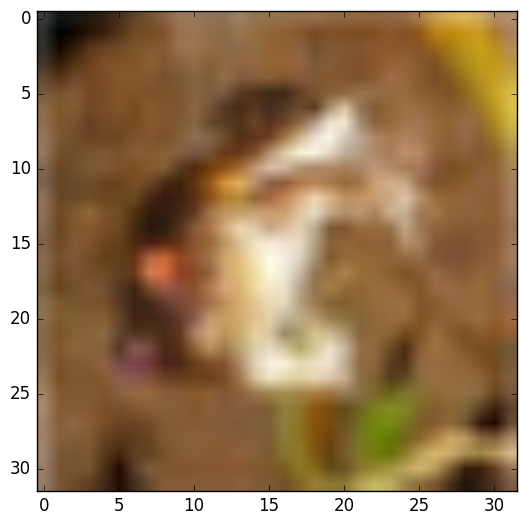

(
[0.231373 0.168627 … 0.596078 0.580392; 0.243137 0.180392 … 0.490196 0.486275; 0.247059 0.176471 … 0.4 0.403922]

[0.0627451 0.0 … 0.466667 0.478431; 0.0784314 0.0 … 0.32549 0.341176; 0.0784314 0.0 … 0.196078 0.223529]

[0.0980392 0.0627451 … 0.470588 0.427451; 0.0941176 0.027451 … 0.329412 0.286275; 0.0823529 0.0 … 0.196078 0.164706]

...

[0.815686 0.788235 … 0.219608 0.207843; 0.666667 0.6 … 0.121569 0.133333; 0.376471 0.133333 … 0.027451 0.0784314]

[0.705882 0.678431 … 0.380392 0.32549; 0.545098 0.482353 … 0.243137 0.207843; 0.376471 0.164706 … 0.133333 0.133333]

[0.694118 0.658824 … 0.592157 0.482353; 0.564706 0.505882 … 0.462745 0.360784; 0.454902 0.368627 … 0.329412 0.282353],

6)

In [8]:
imshow(permutedims(trX[1,:,:,:],[2,3,1]))
trX[1,:,:,:], trY[1]

In [9]:
trY[1:100]

100-element Array{Int64,1}:
 6
 9
 9
 4
 1
 1
 2
 7
 8
 3
 4
 7
 7
 ⋮
 9
 4
 2
 3
 8
 0
 1
 6
 1
 1
 4
 1

In [ ]:
function build_cnn()
    layers = [
        InputLayer((1,3,32,32)), # dummy batch size
        ConvLayer(32,(3,3)),
        ReLu(),
        MaxPoolingLayer((2,2)),
        ConvLayer(64,(3,3)),
        ReLu(),
        MaxPoolingLayer((2,2)),
#         ConvLayer(32,(5,5)),
#         ReLu(),
#         MaxPoolingLayer((2,2)),
        DropoutLayer(0.5),
        DenseLayer(256),
        ReLu(),
        DropoutLayer(0.5),
        DenseLayer(10)
    ]
    criteria = SoftMaxCrossEntropyLoss()
    net = SequentialNet(layers, criteria)
    return net
end